Installing the Libraries

In [4]:
!pip install numpy
!pip install pandas

Importing required modules

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # used for data normalization
from sklearn.model_selection import train_test_split # to split the data into train and test
from sklearn.ensemble import AdaBoostClassifier # to perform adaboost algorithm
from sklearn.tree import DecisionTreeClassifier # to perform decission tree classifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # to calculate metrics

Data Import and Column Definition

In [8]:
columns = ['ID', 'Diagnosis'] + ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
data= pd.read_csv(r"wdbc.data",header=None,names=columns)

Remove Unnecessary Columns

In [10]:
data=data.drop("ID",axis=1)


Data Dimensions

In [12]:
print(data.shape)

(569, 31)


First Few Records of Dataset


In [14]:
data.head()


,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Last Records of Dataset

In [16]:
data.tail()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Data Summary

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    object 
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

Statistical Summary

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Finding Outliers

In [22]:
df = data.copy() # Create a copy of the original DataFrame
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist() # Use np.number 

for column_name in numerical_cols:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Get the number of outliers
    num_outliers = len(outliers)

    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column_name}': {num_outliers}")

Number of outliers for 'radius1': 14
Number of outliers for 'texture1': 7
Number of outliers for 'perimeter1': 13
Number of outliers for 'area1': 25
Number of outliers for 'smoothness1': 6
Number of outliers for 'compactness1': 16
Number of outliers for 'concavity1': 18
Number of outliers for 'concave_points1': 10
Number of outliers for 'symmetry1': 15
Number of outliers for 'fractal_dimension1': 15
Number of outliers for 'radius2': 38
Number of outliers for 'texture2': 20
Number of outliers for 'perimeter2': 38
Number of outliers for 'area2': 65
Number of outliers for 'smoothness2': 30
Number of outliers for 'compactness2': 28
Number of outliers for 'concavity2': 22
Number of outliers for 'concave_points2': 19
Number of outliers for 'symmetry2': 27
Number of outliers for 'fractal_dimension2': 28
Number of outliers for 'radius3': 17
Number of outliers for 'texture3': 5
Number of outliers for 'perimeter3': 15
Number of outliers for 'area3': 35
Number of outliers for 'smoothness3': 7
Num

Missing Data Summary

In [24]:
data.isnull().sum()

Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Identifying Duplicate Entries

In [26]:
data.duplicated().sum()

0

Column Uniqueness Summary


In [28]:
unique_columns=data.nunique()
print(unique_columns)

Diagnosis               2
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
dtype: int64


Mapping Diagnosis to Binary

In [30]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0}).fillna(-1)  # Use -1 or any placeholder for unexpected values
print(data.head())

   Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0          1    17.99     10.38      122.80  1001.0      0.11840   
1          1    20.57     17.77      132.90  1326.0      0.08474   
2          1    19.69     21.25      130.00  1203.0      0.10960   
3          1    11.42     20.38       77.58   386.1      0.14250   
4          1    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0       0.27760      0.3001          0.14710     0.2419  ...    25.38   
1       0.07864      0.0869          0.07017     0.1812  ...    24.99   
2       0.15990      0.1974          0.12790     0.2069  ...    23.57   
3       0.28390      0.2414          0.10520     0.2597  ...    14.91   
4       0.13280      0.1980          0.10430     0.1809  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1   

Normalized DataFrame

In [32]:
scaler = StandardScaler()

# Normalize data
X=data.drop("Diagnosis",axis=1)
normalized_data = scaler.fit_transform(X)

# Convert to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=X.columns)

print(normalized_df)


      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0      2.652874

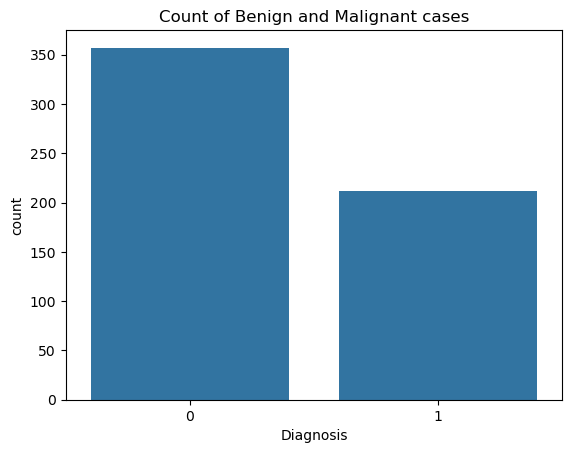

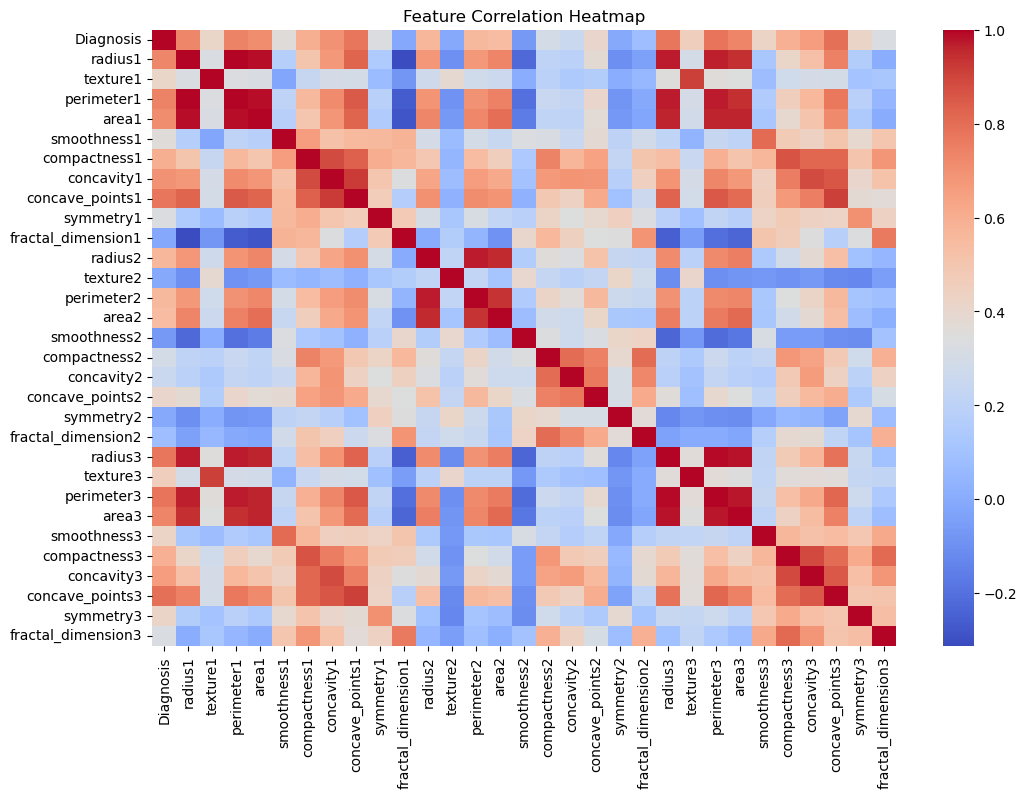

In [33]:


# Countplot of the target variable (Benign vs Malignant)
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.show()

# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

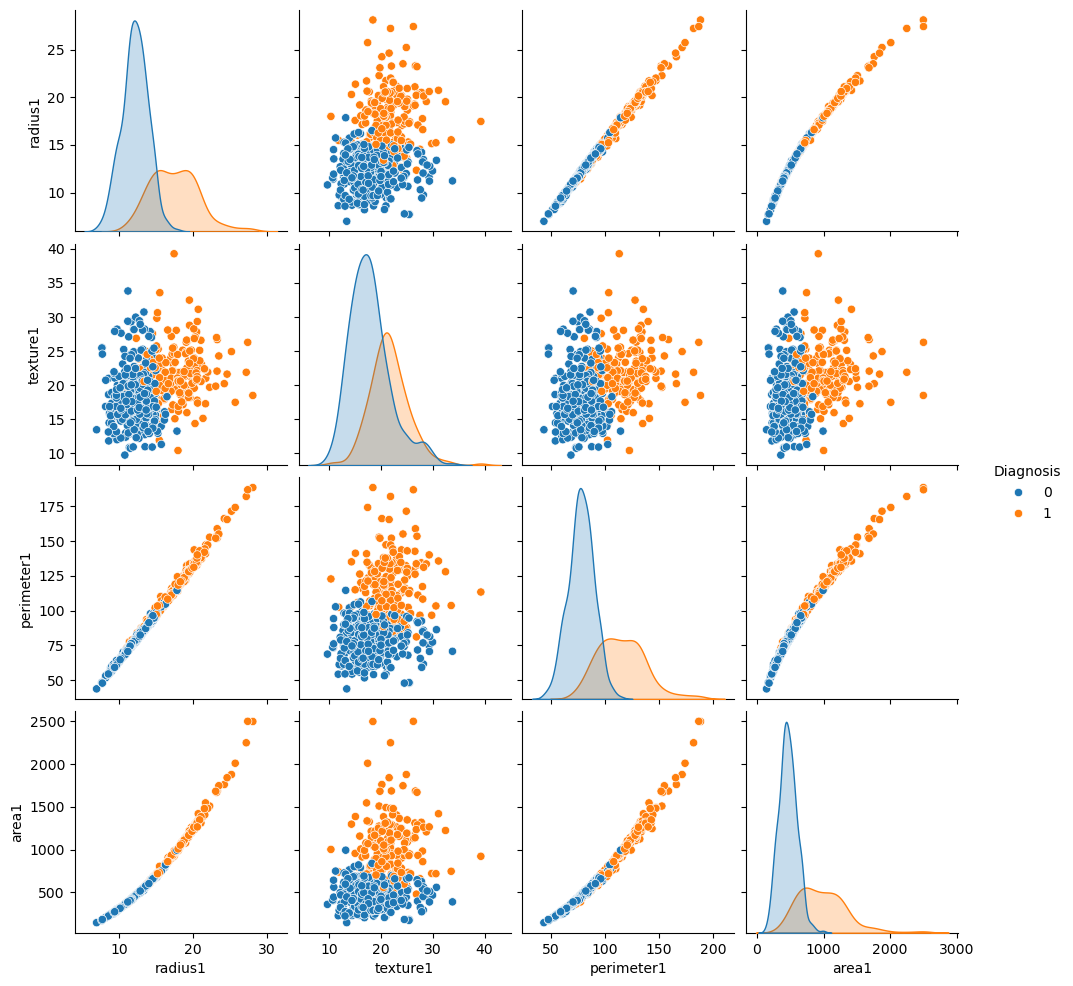

In [34]:
sns.pairplot(data, hue='Diagnosis', vars=['radius1', 'texture1', 'perimeter1', 'area1'])
plt.show()

Splitting Data into Features and Target


In [39]:
y = data['Diagnosis']  # Convert to numerical labels (1 for Malignant, 0 for Benign)
X = data.drop('Diagnosis', axis=1)  # Features
print(X.shape,y.shape)
# know the shape of the data

(569, 30) (569,)


Split training and testing data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (398, 30)
Testing data shape: (171, 30)


Initialize Adaboost Classifier

In [44]:
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(
    n_estimators=50,  # Number of boosting iterations
    learning_rate=1.0,  # Learning rate for each iteration
    algorithm="SAMME",  # Algorithm to use (SAMME or SAMME.R)
    random_state=42  # Random state for reproducibility
)


Train AdaBoost model on training data

In [46]:
model.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME', random_state=42)

 Make predictions on testing data

In [57]:
y_pred = model.predict(X_test)

Evaluate model performance

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix:
[[105   3]
 [  2  61]]


Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ["SAMME", "SAMME.R"]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


C:\Users\hemanth bylupudi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hemanth bylupudi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hemanth bylupudi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hemanth bylupudi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best Score: 0.974873417721519
